# Imports

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os,re
import psycopg2 as pg2

# Adding/Printing to Sample Database

## Adding to Database

In [60]:
def config():
    global database, user, password
    database = 'quantum_pulse'
    user = 'postgres'
    password = 'W402ibdt$$'
    
config()
#conn = pg2.connect(database = database , user = user, password = password)
#cur = conn.cursor()
#First_Name = 'Cam'
#Age = 55
#cur.execute('INSERT INTO Sample_Table(column3,column2) VALUES (%s,%s)', (First_Name, Age))
#conn.commit()
#conn.close()

## Test Printing from Database

In [3]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT * FROM Sample_Table')
data = cur.fetchall()
conn.close()

print(data)

[(1, 50, 'John', 1), (2, 50, 'Jack', 2), (3, 33, 'Ben', 3), (11, 45, 'Rem', 4), (12, 34, 'Rob', 5), (13, 55, 'Cam', 6)]


# Test Graphing 

## Test Graphing Line


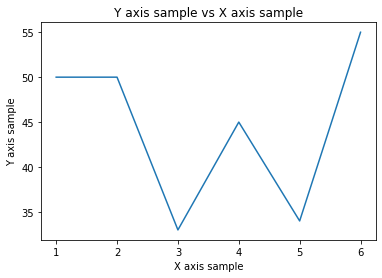

In [19]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column4 FROM Sample_Table')
data1 = cur.fetchall()
cur.execute('SELECT column2 FROM Sample_Table')
data2 = cur.fetchall()
conn.close()

xaxis = 'X axis sample'
yaxis = 'Y axis sample'

#plt.errorbar
#x, y, yerr = random.randint(3, 10)
#errorbar(x, y, yerr, marker='s', mfc='red', mec='green', ms=20, mew=4)
#plt.figure()
#plt.errorbar(data1, data2, xerr=0.2, yerr=0.4)
#plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title(yaxis +' ' + 'vs' + ' ' + xaxis)
plt.plot(data1, data2)
plt.show()


## Test Graphing Error Bars

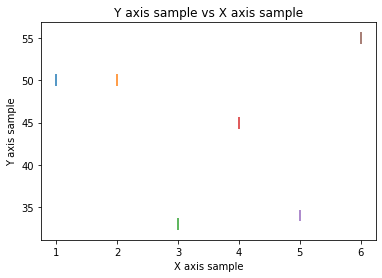

In [31]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column4 FROM Sample_Table')
data1 = cur.fetchall()
cur.execute('SELECT column2 FROM Sample_Table')
data2 = cur.fetchall()
conn.close()

xaxis = 'X axis sample'
yaxis = 'Y axis sample'

#plt.errorbar
#x, y, yerr = random.randint(3, 10)
#errorbar(x, y, yerr, marker='s', mfc='red', mec='green', ms=20, mew=4)
#plt.figure()

N = len(data1)

for i in range (0, N):
    plt.errorbar(data1[i], data2[i], xerr=0, yerr=.7)
#plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title(yaxis +' ' + 'vs' + ' ' + xaxis)
plt.show()

## Test Graph with points

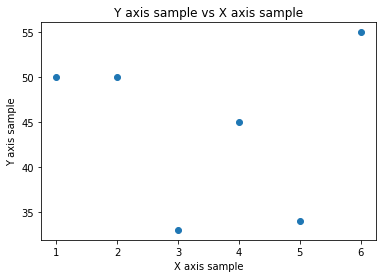

In [11]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column4, column2 FROM Sample_Table')
data = cur.fetchall()
conn.close()

xaxis = 'X axis sample'
yaxis = 'Y axis sample'
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title(yaxis +' ' + 'vs' + ' ' + xaxis)
plt.scatter(*zip(*data))
plt.show()

## Graph with points and error bars

Text(0.5, 1.0, 'Y axis sample vs X axis sample')

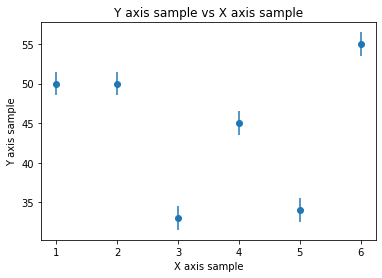

In [58]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column4 FROM Sample_Table')
data1 = cur.fetchall()
cur.execute('SELECT column2 FROM Sample_Table')
data2 = cur.fetchall()
conn.close()

x = data1
y = data2
N = len(data1)

for i in range (0, N):
    plt.errorbar(x[i], y[i], xerr=0, yerr=1.5, color = 'tab:blue')

plt.scatter(data1, data2)
xaxis = 'X axis sample'
yaxis = 'Y axis sample'
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title(yaxis + ' ' + 'vs' + ' ' + xaxis)


# Graphing from Database

## 

In [118]:
def decorator_insert(original_function):
    """

    This function is a decorator for any function that would insert data
    into the DB and is designed in the Query/Content Model.
 
    """
    def wrapper_function(*args,**kwargs):
        a,b = original_function(*args,**kwargs)
        conn = pg2.connect(database= 'quantum_pulse', user='postgres', password='W402ibdt$$')
        cur = conn.cursor()
        executable = cur.mogrify(a,b)
        cur.execute(executable)
        conn.commit()
        conn.close()
    return wrapper_function

def decorator_extract(original_function):
    """

This function is a decorator for any function that would extract data
into the DB and is designed in the Query/Content



|
    """

    def wrapper_function(*args, **kwargs):
        a, b = original_function(*args, **kwargs)
        conn = pg2.connect(database= 'quantum_pulse', user='postgres', password='W402ibdt$$')
        cur = conn.cursor()
        executable = cur.mogrify(a,b)
        cur.execute(executable)
        data = cur.fetchall()
        conn.close()

        return unpack_data(data)

    return wrapper_function

In [119]:
@decorator_insert
def insert_data(params):

    """
        This function is used to upload data into the SQL DB.

        :param: Takes class params and set of params to be inserted.
        :type: list
        :rtype: string,list
        :return: returns a query string and a list of contents.

    """

    query = 'INSERT INTO data(date,data_id,raw_data0,raw_data1,sample,count_time,reset_time,avg,threshold,aom_delay,microwave_delay,type,start,stepsize,steps,pts,srs,avgcount,x_arr,sample_name,nv_name,waveguide,time_stamp) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,CURRENT_TIMESTAMP)'

    content = (params[0],params[1],params[2],params[3],params[4],
               params[5],params[6],params[7],params[8],params[9],
               params[10],params[11],params[12],params[13],params[14],
               params[15],params[16],params[17],params[18],params[19],
               params[20],params[21])
    return (query,content)


@decorator_extract
def extract_data(date = None, data_id = None, key = None, sample = None, count_time = None, reset_time = None,
                     avg = None, threshold = None, aom_delay = None, microwave_delay = None,
                     Type = None, start = None, stepsize = None, steps = None, avgcount = None,
                     pts = None,srs = None, sample_name = None, nv_name = None, waveguide = None):

    """
            This function is used to extract data from the SQL DB.

            :param: Takes inputs of what you want to search.
            :type: string,list
            :rtype: list
            :return: returns data object.

            |


    """
    if(date != None):
        date = date + '%'

        
    if(data_id != None):
        data_id = data_id + '%'

    content = []
    input = [date,data_id,key,sample,count_time,reset_time,avg,threshold,aom_delay,microwave_delay,Type,
             start,stepsize,steps,avgcount,pts,srs,sample_name,nv_name,waveguide]

    input_strings = [" date LIKE %s"," and data_id LIKE %s"," and key = %s"," and sample = %s"," and count_time = %s",
                     " and reset_time = %s"," and avg = %s"," and threshold = %s",
                     " and aom_delay = %s"," and microwave_delay = %s"," and Type = %s",
                     " and start = %s"," and stepsize = %s"," and steps = %s"," and avgcount = %s",
                     " and pts = %s"," and srs = %s"," and sample_name = %s", " and nv_name = %s", " and waveguide = %s"]
    query = 'SELECT * FROM data WHERE'
    val = True
    for i,j in enumerate(input):

        if(j!=None):
            if(input[0]==None and val == True):
                query = query + input_strings[i][4:]
                content.append(j)
                val = False
                continue
            content.append(j)
            query = query + input_strings[i]

    return (query, content)

class unpack_data: #List of all the accesible attributes
    def __init__(self, data):
        self.key = [row[0] for row in data]
        self.date = [row[1] for row in data]
        self.data_id = [row[2] for row in data]
        self.raw_data0 = [row[3] for row in data]
        self.raw_data1 = [row[4] for row in data]
        self.sample = [row[5] for row in data]
        self.count_time = [row[6] for row in data]
        self.reset_time = [row[7] for row in data]
        self.avg = [row[8] for row in data]
        self.threshold = [row[9] for row in data]
        self.aom_delay = [row[10] for row in data]
        self.mw_delay = [row[11] for row in data]
        self.type = [row[12] for row in data]
        self.start = [row[13] for row in data]
        self.stepsize = [row[14] for row in data]
        self.steps = [row[15] for row in data]
        self.pts = [row[16] for row in data]
        self.srs = [row[17] for row in data]
        self.avgcount = [row[18] for row in data]
        self.x_arr = [row[19] for row in data]
        self.sample_name = [row[20] for row in data]
        self.nv_name = [row[21] for row in data]
        self.waveguide = [row[22] for row in data]
        self.time_stamp = [row[23] for row in data]

In [120]:
def get_date(filepath):
    pathsplit = PurePath(filepath).parts
    return pathsplit[-2]

def get_data_id(filepath):
    pathsplit = PurePath(filepath).parts
    return pathsplit[-1]

def files_in_dir(dir_path):
    path = Path(dir_path).glob('**/*')
    files = [x for x in path if x.is_file()]

    all_files = []
    for file in files:
        file1= str(file)[:-4]
        if(file1 not in all_files and file1[46:48] != '._'):
            all_files.append(file1)
    return all_files

def parse_raw_data(file):
    filename = file+".txt"
    data = np.genfromtxt(filename,delimiter='\t')
    return (data[:,0],data[:,1])


def parse_data(file):
    
    data1,data2 = parse_raw_data(file)
    
    mfilename = file+".log"
    mfilehandle =open(mfilename)
    mdata = mfilehandle.readlines()
    mfilehandle.close()
    parse_data =[(x.strip('\n')) for x in mdata]
    param0 = [float(x) for x in (parse_data[0]).strip('][').split(', ')]
    param1 = eval(parse_data[1])
    param2 = eval(parse_data[2])
    param3 = int(parse_data[3])
    param4 = [float(x) for x in ((parse_data[4])[:-1]).split('\t')]
    param5 = (parse_data[6]).replace(" ",'_')[13:]
    param6 = parse_data[7][9:]
    param7 = parse_data[8].replace(" ",'_')[11:]
    
    date = get_date(file)
    data_id = get_data_id(file)
    sample = param0[0]
    count_time = param0[1]
    reset_time = param0[2]
    avg = param0[3]
    threshold = param0[4]
    aom_delay = param0[5]
    microwave_delay = param0[6]
    Type = str(param1['type'])
    start = float(param1['start'])
    stepsize = float(param1['stepsize'])
    steps = float(param1['steps'])
    pts = str(param2['PTS'])
    srs = str(param2['SRS'])
    avgcount = param3
    x_arr = param4
    sample_name = param5
    nv_name = param6
    waveguide = param7
    
    content = [date,data_id,list(data1),list(data2),sample,count_time,reset_time,avg,threshold,aom_delay,microwave_delay,Type,start,stepsize,steps,pts,srs,avgcount,x_arr,sample_name,nv_name,waveguide]
    
    return content
    

def upload(dir_path = r"/Users/ethanlilie/Downloads/DataR"):
    
    files = files_in_dir(dir_path)
    
    for file in files:
        try:
            content = parse_data(file)
            insert_data(content)
        except:
            a = PurePath(file).parts
            if(str(a[-1])[0:2] != "._"):
                print("Didn't work for %s" %file)
    

In [121]:
def analyze_data(data,pos):
    
    tempsig = np.array(data.raw_data0[pos]).astype('float64')
    tempref = np.array(data.raw_data1[pos]).astype('float64')
    numavgs = int(data.avgcount[pos])
    
    # the signal and refernce arrays need to be partitioned into lists
    # that are have numavg rows and numpoints columns
    tempsig = np.array_split(tempsig, numavgs)
    tempref = np.array_split(tempref, numavgs)
    #average along the rows
    signal = np.average(tempsig,axis=0)
    reference = np.average(tempref,axis=0)
    meanref = np.mean(reference)
    #calculate errors in signal and reference and then the x and y data
    sigerr=np.sqrt(signal)
    referr = np.sqrt(reference)
    #xdata = np.linspace(timestart,timestep*len(signal),len(signal))
    xdata = np.array(data.x_arr[pos]).astype('float64')  # it appears Kai saves the x array into the last element of mdata
    ydata = (signal - reference)/meanref + 1.0
    #error bar calculation is not perfect yet, error in meanref needs to
    #be taken into account
    errb = np.sqrt(sigerr**2 + referr**2)/meanref/np.sqrt(numavgs)
    # plt.errorbar(xdata,ydata,yerr=errb,fmt='o')
    # plt.show()
    return xdata,ydata,errb

def plotsingledatafile(data,pos,**kwargs):
    '''Plots the data in a file
    :param file: the path for the data file
    :param xaxis: kwarg string that gives the label for the x-axis
    :param yaxis: kwarg string that gives label for y-axis '''
    try:
        x1,y1,y1errb = analyze_data(data,pos)
        newdic = dict([])
        for k,v in kwargs.items():
            newdic[k] = v
        x_plot = np.linspace(x1[0],x1[-1],100)
        namestr = data.data_id[pos]
        with plt.style.context('classic'):
            f=plt.figure(figsize=(20,8))
            plt.errorbar(x1,y1,yerr=y1errb,fmt='b-o',ecolor = 'blue')
            plt.title("Name: "+namestr + "\n")
            plt.xlabel(str(newdic['xaxis']))
            plt.ylabel(str(newdic['yaxis']))
            plt.xlim(x1[0],x1[-1])
            ymax = np.amax(y1)
            ymin = np.amin(y1)
            #print('ymax = {0},ymin = {1}'.format(ymax,ymin))
            plt.ylim(ymin-0.025,ymax+0.025)
            plt.tight_layout()
            plt.grid()
            plt.show()
    except:
        print("No data found!")

# NV Center #2

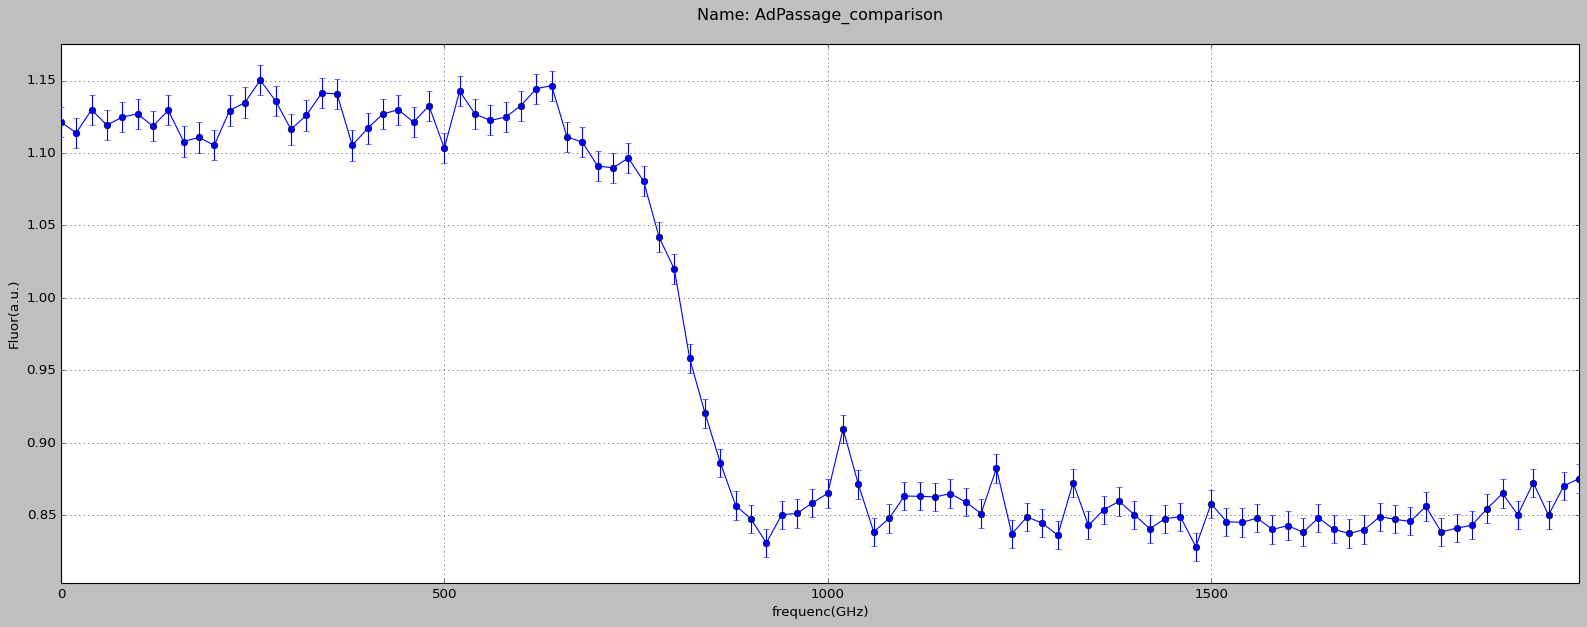

In [141]:
data = extract_data(nv_name = '#2')
pos = 3
plotsingledatafile(data,pos,xaxis=r'frequenc(GHz)',yaxis=r'Fluor(a.u.)')

#print(data.data_id)

## Data from 2021-05-19

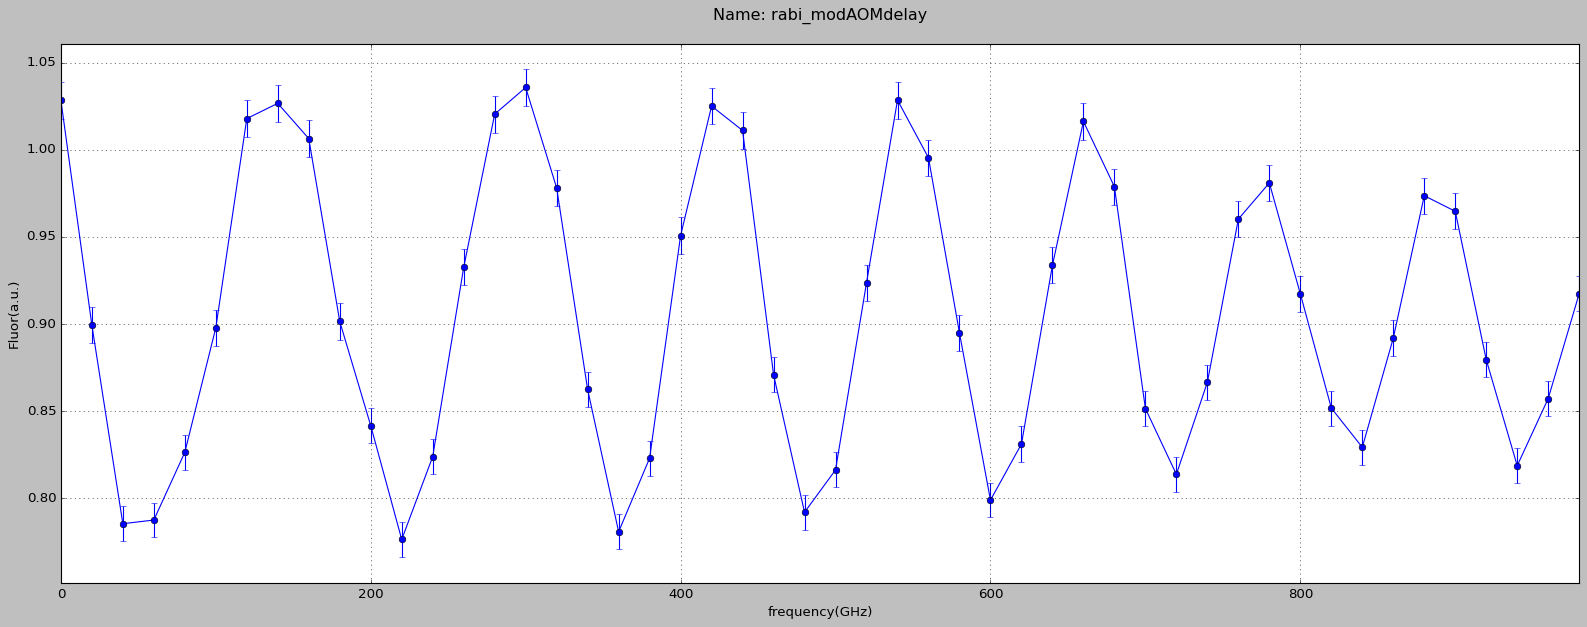

In [127]:
data = extract_data(date = '2021-05-19')
pos = 0 
plotsingledatafile(data,pos,xaxis=r'frequency(GHz)',yaxis=r'Fluor(a.u.)')

# Data with aom_delay = 710

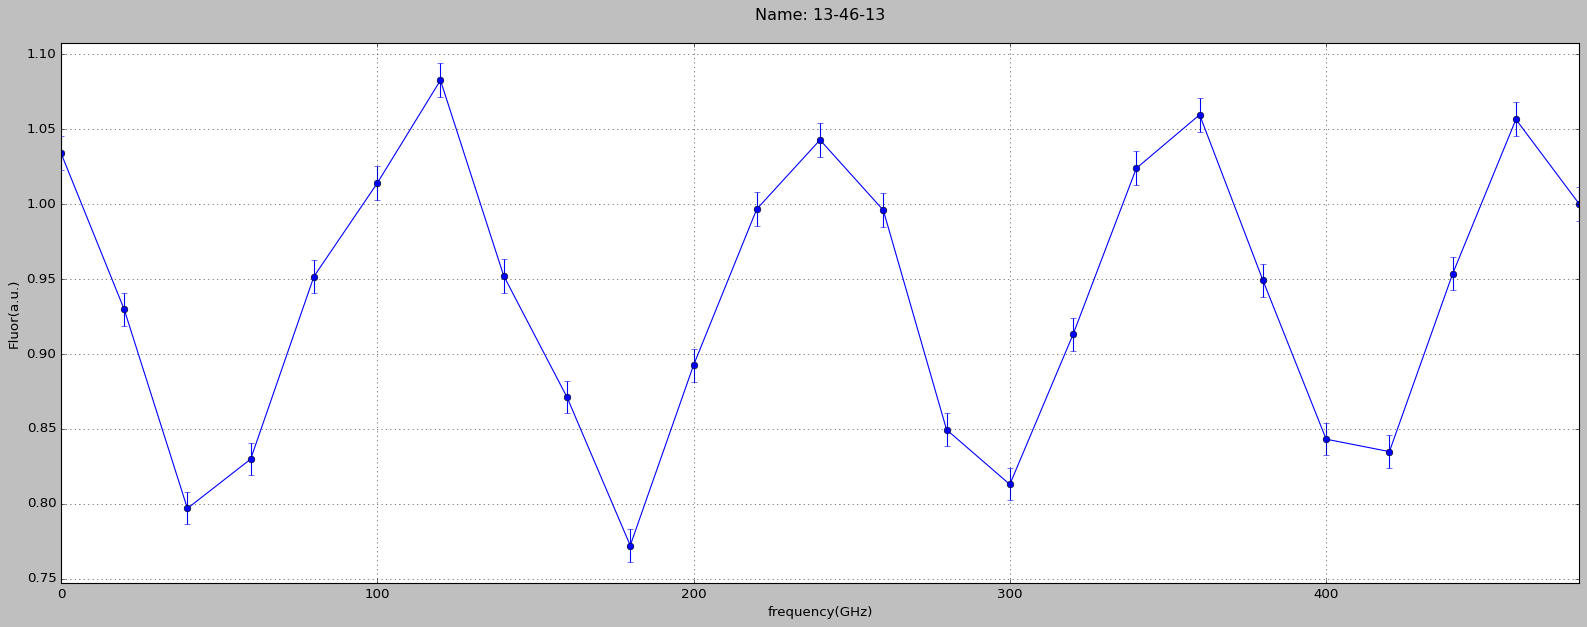

In [146]:
data = extract_data(aom_delay = 710)
pos = 0 
plotsingledatafile(data, pos, xaxis=r'frequency(GHz)',yaxis=r'Fluor(a.u.)')
